In [8]:
import pandas as pd
import numpy as np
import ast
from geopy.distance import geodesic
import polyline
import json
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [2]:
df = pd.read_csv('/home/smebellis/ece5831_final_project/processed_data/post_processing_clustered.csv') 
sampled_df = df.sample(n=1000, random_state=42)

In [5]:
# Features and target
X = df[['WEEKDAY', 'TIME_PERIODS', 'DISTRIC_CLUSTER']]
y = df['TRAFFIC_STATUS']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
le_trip_day = LabelEncoder()
le_trip_time = LabelEncoder()
le_trip_district = LabelEncoder()
le_traffic = LabelEncoder()


In [7]:
X_train['WEEKDAY'] = le_trip_day.fit_transform(X_train['WEEKDAY'])
X_train['TIME_PERIODS'] = le_trip_time.fit_transform(X_train['TIME_PERIODS'])
X_train['DISTRIC_CLUSTER'] = le_trip_district.fit_transform(X_train['DISTRIC_CLUSTER'])
y_train = le_traffic.fit_transform(y_train)


X_test['WEEKDAY'] = le_trip_day.transform(X_test['WEEKDAY'])
X_test['TIME_PERIODS'] = le_trip_time.transform(X_test['TIME_PERIODS'])
X_test['DISTRIC_CLUSTER'] = le_trip_district.transform(X_test['DISTRIC_CLUSTER'])
y_test = le_traffic.transform(y_test)

In [9]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [10]:
params = {
    'objective': 'reg:logistic',
    'max_depth': 6,  # You can tune this hyperparameter
    'eta': 0.1,      # Learning rate, can be tuned
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}

In [13]:
# Ensure labels are binary (0 or 1)
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

dtrain = xgb.DMatrix(X_train, label=y_train_binary)
dtest = xgb.DMatrix(X_test, label=y_test_binary)

evals = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=10)


[0]	train-rmse:0.31427	eval-rmse:0.31530
[1]	train-rmse:0.31323	eval-rmse:0.31428
[2]	train-rmse:0.31238	eval-rmse:0.31346
[3]	train-rmse:0.31167	eval-rmse:0.31276
[4]	train-rmse:0.31109	eval-rmse:0.31220
[5]	train-rmse:0.31063	eval-rmse:0.31175
[6]	train-rmse:0.31024	eval-rmse:0.31137
[7]	train-rmse:0.30994	eval-rmse:0.31108
[8]	train-rmse:0.30969	eval-rmse:0.31084
[9]	train-rmse:0.30948	eval-rmse:0.31064
[10]	train-rmse:0.30930	eval-rmse:0.31047
[11]	train-rmse:0.30916	eval-rmse:0.31034
[12]	train-rmse:0.30905	eval-rmse:0.31023
[13]	train-rmse:0.30895	eval-rmse:0.31014
[14]	train-rmse:0.30887	eval-rmse:0.31007
[15]	train-rmse:0.30881	eval-rmse:0.31001
[16]	train-rmse:0.30876	eval-rmse:0.30996
[17]	train-rmse:0.30872	eval-rmse:0.30993
[18]	train-rmse:0.30869	eval-rmse:0.30990
[19]	train-rmse:0.30866	eval-rmse:0.30987
[20]	train-rmse:0.30864	eval-rmse:0.30986
[21]	train-rmse:0.30862	eval-rmse:0.30984
[22]	train-rmse:0.30860	eval-rmse:0.30983
[23]	train-rmse:0.30859	eval-rmse:0.30982
[2

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

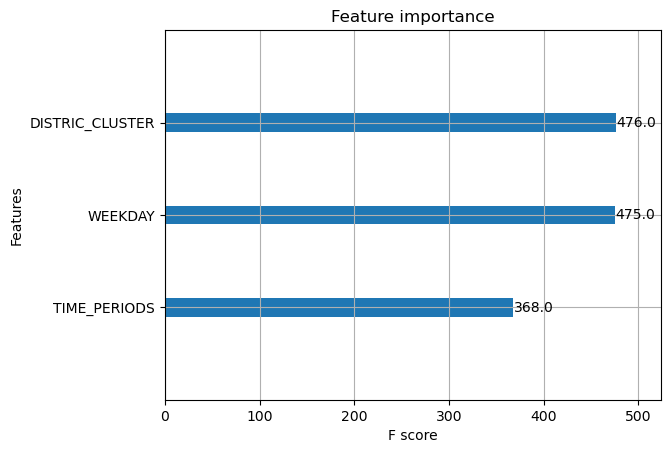

In [14]:
xgb.plot_importance(model)